# Dataset 1

In [704]:
#LOADING OF DATA from Dataset1

import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
print(train.shape)
print(train.columns)
test = pd.read_csv('test.csv')
print(test.shape)
print(test.columns)

(2000, 21)
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
(1000, 21)
Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [705]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


As we can see, the dataset contains only the price range, not the specific pricing.

In [706]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We see the number of columns and rows, and the labels per columns. The train data contains the price_range while the test data do not. Since the price_range will be our dependent variable "y", then the test data will only be for independent variable "X". 

Now, we are going to analyze the relationship between the features

In [707]:
#This will create a correlation table
corr= train.corr()

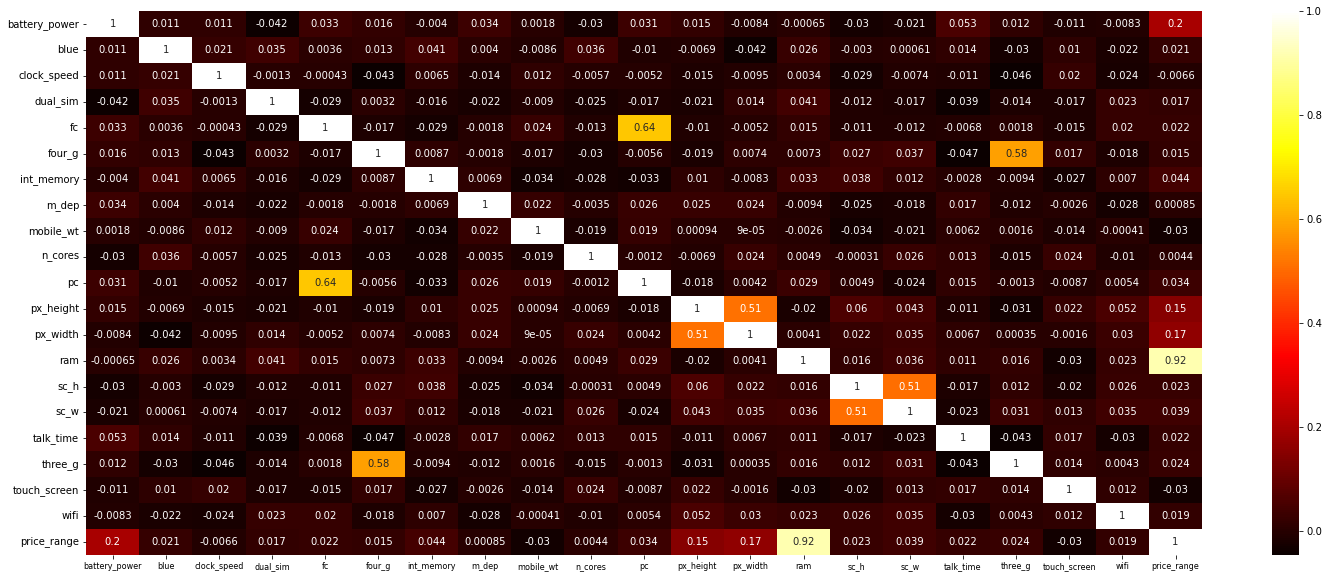

In [708]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plotting Correlation with heat map to emphasize the relationship
plt.figure(figsize=(25,10))
sns.heatmap(corr,cbar=True,annot=True,cmap="hot")
plt.show()


What we need to know here is the price relationship among other features. As we can see, the feature with the strongest correlation with the price is ram, followed by battery, px_width, and then px_height.

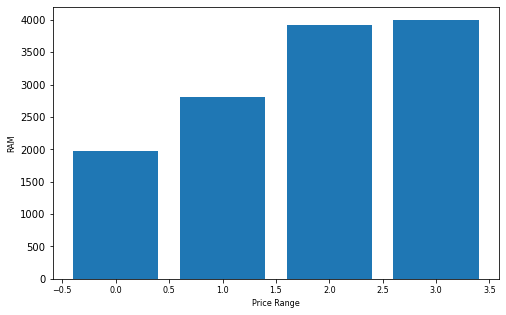

In [709]:
plt.figure(figsize=(8,5))
plt.bar(train.price_range,train.ram)
plt.xlabel("Price Range")
plt.ylabel("RAM")
plt.show()

Since the correlation indicates that some features are not significant, we can further classify features by their degree of importance.

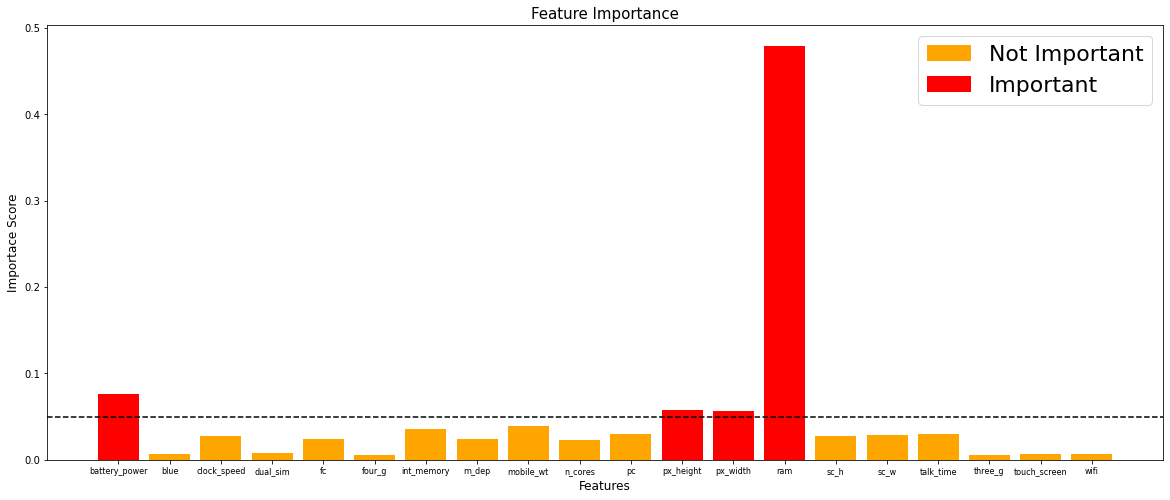

In [710]:
from sklearn.ensemble import RandomForestClassifier

X = train.drop(['price_range'], axis=1)
y = train['price_range'].values

feature_selector = RandomForestClassifier()
feature_selector.fit(X,y)
features = X.columns
feature_imps = feature_selector.feature_importances_
mean_imp = feature_imps.mean()

plt.figure(figsize=(20,8))
plt.title("Feature Importance",fontsize=15)
plt.bar(features,feature_imps,color="orange",label="Not Important")
plt.bar(features[feature_imps>mean_imp],feature_imps[feature_imps>mean_imp],color="r",label="Important")
plt.axhline(mean_imp,color="k",linestyle="dashed")
plt.xlabel("Features",fontsize=12)
plt.ylabel("Importace Score",fontsize=12)
plt.legend(fontsize=22)
plt.show()

Through Random Forest Classifier, we see that some features are not relevant to modelling our price prediction. Now, we will drop them from the selection.

In [711]:
unwanted_features = ['blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
X.drop(unwanted_features,axis=1,inplace=True)
X.columns

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

Now, we can see that the remaining features columns are the four siginificant factors that affects the models.

In [712]:
#split dataset into training and test sets using 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

#Standardize the remaining features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [713]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state = 2)
rfc.fit(X_train_scaled,y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Random Forest Classifier: ' + str(accuracy_rfc*100) +'%' + '\n')

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
y_pred_dtc=dtc.predict(X_test_scaled)
accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
print('Decision Tree Classifier: ' + str(accuracy_dtc*100) +'%' + '\n')

svc = SVC(gamma=2, C=1)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print('Support Vector Classifier: ' + str(accuracy_svc*100) +'%' + '\n')

knc = KNeighborsClassifier()
knc.fit(X_train_scaled,y_train)
y_pred_knc= knc.predict(X_test_scaled)
accuracy_knc = accuracy_score(y_test,y_pred_knc)
print('KNeighborsClassifier: ' + str(accuracy_knc*100) +'%' + '\n')

xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
y_pred_xgb= knc.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
print('XGBoost Classifier: ' + str(accuracy_xgb*100) +'%' + '\n')

Random Forest Classifier: 88.9%

Decision Tree Classifier: 84.3%

Support Vector Classifier: 89.7%

KNeighborsClassifier: 87.6%

XGBoost Classifier: 87.6%



Here we use 5 different machine learning classification models with their accompanying accuracy score. We can say that with the Random Forest and Support Vector Classifier, we can achieve higher accuracy, but given more training and testing, we could try improving the results.

Now, using the testing dataset, we will also delete unwanted features, and perform standardization.

In [714]:
unwanted_features = ['id', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
        'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
X_sample= test.drop(unwanted_features,axis=1)

X_sample_scaled = scaler.transform(X_sample)
X_sample.columns

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

Similarly, we left the four relevant features.

In [715]:

y_pred_rfc = rfc.predict(X_sample_scaled)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Random Forest Classifier: ' + str(accuracy_rfc*100) +'%' + '\n')


y_pred_dtc=dtc.predict(X_sample_scaled)
accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
print('Decision Tree Classifier: ' + str(accuracy_dtc*100) +'%' + '\n')


y_pred_svc = svc.predict(X_sample_scaled)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print('Support Vector Classifier: ' + str(accuracy_svc*100) +'%' + '\n')


y_pred_knc= knc.predict(X_sample_scaled)
accuracy_knc = accuracy_score(y_test,y_pred_knc)
print('KNeighborsClassifier: ' + str(accuracy_knc*100) +'%' + '\n')


y_pred_xgb= knc.predict(X_sample_scaled)
accuracy_xgb = accuracy_score(y_test,y_pred_knc)
print('XGBoost Classifier: ' + str(accuracy_xgb*100) +'%' + '\n')

Random Forest Classifier: 26.900000000000002%

Decision Tree Classifier: 26.5%

Support Vector Classifier: 26.0%

KNeighborsClassifier: 26.0%

XGBoost Classifier: 26.0%



This doesn't quite gives enough confidence. Still, needs to be improved.